In [8]:
import cv2
from skimage.util import img_as_float, img_as_ubyte
from skimage import io
import matplotlib.pyplot as plt

In [3]:
VERTEBRA_PATH = "data/vertebra.png"

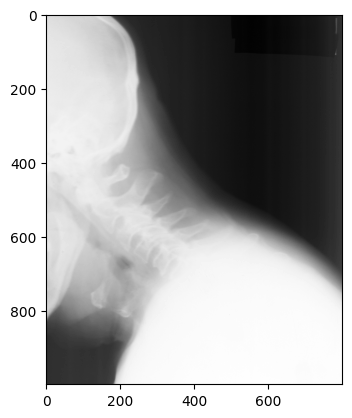

In [18]:
img = io.imread(VERTEBRA_PATH)
img = img_as_float(img)
img = img_as_ubyte(img)

plt.imshow(img, cmap='gray')

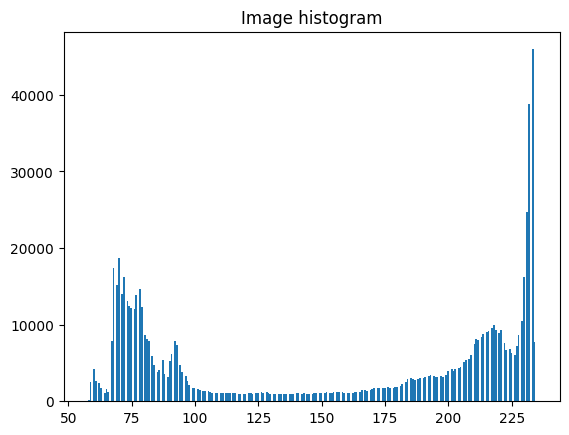

In [19]:
# histogram of image
h = plt.hist(img.ravel(), bins=256)
plt.title('Image histogram')
io.show()

In [20]:
print(img.min(), img.max())

57 235


In [ ]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
	
    # Do something here
    img_out = (max_desired - min_desired) / (max_val - min_val) * (img_in - min_val) + min_desired

    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)